Use case: Build an ANN model that predicts the Power Energy for Powerplant based data. Independent features: sensor readings related to powerplant machines

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
import pandas as pd
df = pd.read_csv(r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/PowerPlant.csv')
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


AT: Atmospheric Temperature V: Vaccum AP: Atmospheric Pressure RH: Relative Humidity PE: Power Energy


Perform basic data quality checks

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [ ]:


df.duplicated().sum()

np.int64(41)

In [ ]:


df=df.drop_duplicates()

Seperate x and y features

In [ ]:
X = df.drop(columns = ['PE'])
Y = df[["PE"]]

In [ ]:


X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [ ]:

Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43



Data Preprocessing and Data cleaning

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),StandardScaler()).set_output(transform='pandas')


In [ ]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837



Train test split

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.85,random_state=21)


In [ ]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(8097, 4) (1430, 4) (8097, 1) (1430, 1)


Artificial Neural Network Model Building

In [ ]:
from keras.models import Sequential
from keras.layers import Input,Dense

In [ ]:
xtrain.shape

(8097, 4)

In [ ]:
xtrain.shape[1]

4

In [ ]:
model=Sequential()
#Add the Input Layer
model.add(Input(shape = (xtrain.shape[1],)))
#Add the Hidden layer1
model.add(Dense(units = 8,activation = 'relu'))
# Add the Hidden layer2
model.add(Dense(units=4,activation='relu'))

# Add the output layer
model.add(Dense(units=1,activation='linear'))


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])


In [ ]:
nn = model.fit(xtrain,ytrain,validation_split=0.2,epochs=40)

Epoch 1/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 206061.6094 - mae: 453.5930 - val_loss: 204083.3125 - val_mae: 451.3708
Epoch 2/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 201371.1875 - mae: 448.2929 - val_loss: 193819.2969 - val_mae: 439.5504
Epoch 3/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 188230.8594 - mae: 432.9341 - val_loss: 169147.5781 - val_mae: 409.6470
Epoch 4/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 158648.2031 - mae: 395.9781 - val_loss: 131024.4219 - val_mae: 357.6526
Epoch 5/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 119464.2422 - mae: 339.5582 - val_loss: 88936.8828 - val_mae: 287.1838
Epoch 6/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 77722.2734 - mae: 264.0665 - val_loss: 54763.8125 - val_mae: 215.1969
Epoch 7/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 48386.8984 - mae: 199.0152 - val_loss: 34431.2188 - val_mae: 163.4840
Epoch 8/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 31381.7676 - mae: 154

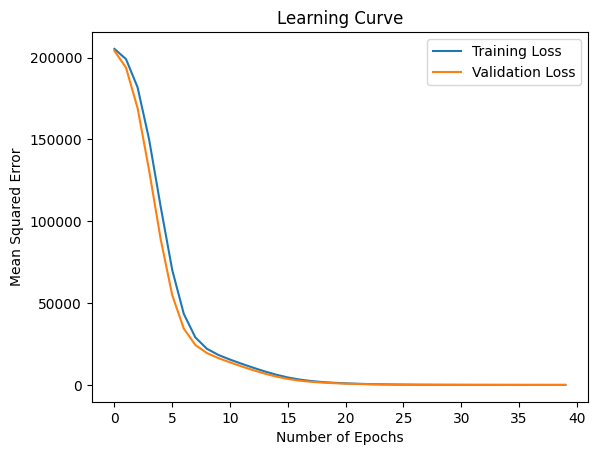

In [ ]:
## Plot the learning curve
import matplotlib.pyplot as plt
plt.plot(nn.history['loss'],label='Training Loss')
plt.plot(nn.history['val_loss'],label='Validation Loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Learning Curve")
plt.show()

Evaluate the model

In [ ]:
model.evaluate(xtrain,ytrain)

254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 28.0095 - mae: 3.9116


[28.046619415283203, 3.9150683879852295]

In [ ]:
model.evaluate(xtest,ytest)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25.6141 - mae: 3.8282


[25.616050720214844, 3.8675081729888916]

In [ ]:


ypred_test = model.predict(xtest)

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [ ]:
ypred_train=model.predict(xtrain)

254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse1 = mean_squared_error(ytrain,ypred_train)
mae1 = mean_absolute_error(ytrain,ypred_train)
r21 = r2_score(ytrain,ypred_train)

print(f"Mean Squared Error:{mse1}")
print(f"Mean Absolute Error:{mae1}")
print(f"R2 Score:{r21}")




Mean Squared Error:28.046613693237305
Mean Absolute Error:3.9150683879852295
R2 Score:0.9030564427375793


save the model

In [ ]:
model.save('PEPredictions.keras')

Load the model

In [ ]:
from keras.models import load_model
m = load_model('/content/PEPredictions.keras')
m.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)


Generate out of sample predictions

In [ ]:
xnew = pd.read_csv(r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/PowerPlantTest.csv')
xnew


,AT,V,AP,RH
0,25,51.5,1000.1,57.0
1,32,41.0,1051.1,80.0
2,28,NaN,1010.2,NaN


In [ ]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.717594,-0.220203,-2.211551,-1.118316
1,1.657948,-1.047911,6.373998,0.456299
2,1.120603,0.000000,-0.511275,0.000000


In [ ]:
PE_preds = m.predict(xnew_pre)
PE_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[443.72104],
       [447.48798],
       [437.65738]], dtype=float32)

In [ ]:
xnew

,AT,V,AP,RH
0,25,51.5,1000.1,57.0
1,32,41.0,1051.1,80.0
2,28,NaN,1010.2,NaN


In [ ]:


xnew["PE predictions"] = PE_preds.round()

In [ ]:
xnew

,AT,V,AP,RH,PE predictions
0,25,51.5,1000.1,57.0,444.0
1,32,41.0,1051.1,80.0,447.0
2,28,NaN,1010.2,NaN,438.0


In [ ]:


xnew['PE predictions'] = xnew['PE predictions'].astype(int).round(2)

In [ ]:
xnew

,AT,V,AP,RH,PE predictions
0,25,51.5,1000.1,57.0,444
1,32,41.0,1051.1,80.0,447
2,28,NaN,1010.2,NaN,438


In [ ]:
xnew.to_csv("Prediction_Results_updated.csv",index = False)

# New Section